# Tenta 20-08-24
## Uppgift 3

In [243]:
from mtm026 import *

In [244]:
epsilon_x = 0.003
epsilon_y = -0.001
epsilon_z = -0.002
gamma_xy = 0.004
gamma_xz = -0.003

E = 70e3            # MPa
v = 0.3

G = E / (2 * (1 + v))

# Anta α = 0

sigma_x = E / (1 + v) * (epsilon_x + v / (1- 2*v) * (epsilon_x+epsilon_y+epsilon_z))
sigma_y = E / (1 + v) * (epsilon_y + v / (1- 2*v) * (epsilon_x+epsilon_y+epsilon_z))
sigma_z = E / (1 + v) * (epsilon_z + v / (1- 2*v) * (epsilon_x+epsilon_y+epsilon_z))
sigma = [sigma_x, sigma_y, sigma_z]

tau_xy = G * gamma_xy
tau_xz = G * gamma_xz
tau = [0, tau_xz, tau_xy]

displayvar('\\sigma', sigma)
displayvar('\\tau', tau)

# a, svar

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [245]:
sigma_s = 450

# Von mises: σs = sqrt(σ2 x + σ2 y + σ2 z − σxσy −σy σz −σz σx +3τ2 xy +3τ2 yz +3τ2 zx)

a = sigma_s**2 -sigma_x**2 -sigma_y**2 -sigma_z**2 + sigma_x*sigma_y + sigma_y*sigma_z + sigma_z*sigma_x -3*tau_xy**2 -3*tau_xz**2
tau_yz = np.sqrt(a/3)
tau[0] = tau_yz

gamma_yz = 1 / G * tau_yz
gamma = [gamma_yz, gamma_xz, gamma_xy]

displayvar('\\tau', tau)
displayvar('\\gamma', gamma)

# b, svar

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Uppgift 4

In [246]:
a, E, p0, p = sp.symbols('a, E, p0 p')

v = 0.4
v_al = 0.3
E_al = 10*E
h = a/15
r = a

# Röret
sigma_r = sigma_z = tau = 0
sigma_phi = sigma0 = p * a / (2 * h/2)
u_pipe = 1/E_al * (sigma_phi - v_al*(sigma_r + sigma_z)) * a

displayvar('u_{rör}(r)', u_pipe)

# Plugg
sigma_z = -p0
# =>
sigma_phi = sigma_r = A = -p

u_plug = 1/E * (sigma_phi -v*(sigma_r + sigma_z))*a

displayvar('u_{plugg}(r)', u_plug)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [247]:
# u_rör(r) = u_plugg(r)

p = sp.solve(u_pipe - u_plug, p)

displayvar('p', p)

<IPython.core.display.Math object>

## Uppgift 5

In [248]:
D = 36e-3           # [m]
R_a = 10e-6         # [m]
rho = 3e-3          # [m]
d = 30e-3           # [m]

sigma_s = 250e6     # [Pa]
sigma_B = 490e6     # [Pa]
sigma_u = 180e6     # [Pa]
sigma_up = 160e6    # [Pa]

print(rho/d)
print(D/d)

lamda = 1
K_d = 1
K_t = 2.2
K_r = 1/ 0.9
K_f = 1 + 0.8*(K_t -1)

def red(sigma):
    return lamda / (K_d*K_r*K_f) * sigma

sigma_u_red = red(sigma_u)
sigma_up_red = red(sigma_up)

displayvar('\sigma_{u,red}', sigma_u_red)
displayvar('\sigma_{up,red}', sigma_up_red)

0.1
1.2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

[  0. 160. 250.]
[82.65306122 73.46938776  0.        ]


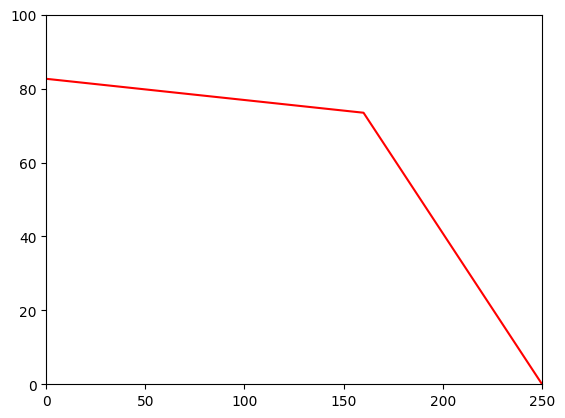

In [249]:
import matplotlib.pyplot as plt

x = np.array([0, 160e6, sigma_s])
y = np.array([sigma_u_red, sigma_up_red, 0])

x *= 10**-6
y *= 10**-6

print(x)
print(y)

plt.plot(x, y, color='red')
plt.xlim(0, sigma_s*10**-6)
plt.ylim(0, 100)
plt.show()